In [2]:
# importation of libraries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline 
import datetime
import warnings
# warnings.filterwarnings('ignore')

<div>
<h1 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px">Data Information</h1>
<p>This data was collected via IoT devices from June 25th, 2019 to April 14th, 2020 which was updated every 15 minutes.</p>

<div style="display:flex">
<div>
<b>Overview</b>
<ul>
    <li>OTI- Oil Temperature Indicator</li>
    <li>WTI- Winding Temperature Indicator</li>
    <li>ATI- Ambient Temperature Indicator</li>
    <li>OLI- Oil Level Indicator</li>
    <li>OTIA- Oil Temperature Indicator Alarm OTIT</li>
    <li>Oil Temperature Indicator Trip</li>
    <li>MOG_A- Magnetic oil gauge indicator</li>
</ul>
</div>
<div>
<b>CurrentVoltage</b>
<ul>
    <li>VL1- Phase Line 1</li>
    <li>VL2- Phase Line 2</li>
    <li>VL3- Phase Line 3</li>
    <li>IL1- Current Line 1</li>
    <li>IL2- Current Line 2</li>
    <li>IL3- Current Line 3</li>
    <li>VL12- Voltage line 1 2</li>
    <li>VL23- Voltage line 2 3</li>
    <li>VL31- Voltage line 3 1</li>
    <li>INUT- Neutral Current</li>
</ul>
</div>
</div>
</div>

In [3]:
# Transformer data overview
tf = pd.read_csv('Overview.csv')
display(tf.shape) 
tf.head()

(20316, 8)

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25T13:06,0.0,0.0,0.0,37.0,0.0,0.0,0.0
1,2019-06-25T13:09,0.0,0.0,0.0,37.0,0.0,0.0,0.0
2,2019-06-27T10:49,0.0,0.0,0.0,38.0,0.0,0.0,0.0
3,2019-06-27T10:51,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27T10:52,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [4]:
# Converting to datetime datatype
tf['DeviceTimeStamp'] = pd.to_datetime(tf['DeviceTimeStamp'], format='%Y-%m-%dT%H:%M')

tf.head()

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25 13:06:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0
1,2019-06-25 13:09:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0
2,2019-06-27 10:49:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
3,2019-06-27 10:51:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0


In [5]:
# transformer current and voltage overview
current_voltage_data = pd.read_csv('CurrentVoltage.csv')
display(current_voltage_data.shape)
current_voltage_data.head()

(19352, 11)

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25T13:06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27T10:49,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27T10:51,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27T10:52,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">Converting to datetime datatype
</span>

In [6]:
# Converting to datetime datatype
current_voltage_data['DeviceTimeStamp'] = pd.to_datetime(current_voltage_data['DeviceTimeStamp'], format='%Y-%m-%dT%H:%M')

current_voltage_data.head()

,DeviceTimeStamp,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25 13:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27 10:49:00,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27 10:51:00,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<span style="background-color:red;
             color:white;
             font-size:17px;
             text-align:center;
             border-radius:30px 80px;
             font-weight:bold;
             border:2px solid red;
             padding:0px 20px;">Merge both dataframes along DeviceTimeStamp
</span>

In [7]:
# Merge both dataframes along DeviceTimeStamp
transformer = pd.merge(tf, current_voltage_data, on='DeviceTimeStamp', how='outer')
trans_details=transformer.drop(['DeviceTimeStamp'],axis=1)
trans_details.describe().T

,count,mean,std,min,25%,50%,75%,max
OTI,21174.0,30.177860,11.961138,0.0,26.0,30.0,34.0,250.0
WTI,21174.0,0.259564,0.438406,0.0,0.0,0.0,1.0,1.0
ATI,21174.0,27.740059,5.750776,0.0,24.0,28.0,32.0,44.0
OLI,21174.0,69.661519,27.792580,36.0,40.0,64.0,100.0,100.0
OTI_A,21174.0,0.004770,0.068902,0.0,0.0,0.0,0.0,1.0
OTI_T,21174.0,0.002220,0.047063,0.0,0.0,0.0,0.0,1.0
MOG_A,21174.0,0.101681,0.302236,0.0,0.0,0.0,0.0,1.0
VL1,20652.0,241.023455,9.392606,0.0,235.8,242.4,247.3,261.2
VL2,20652.0,240.490538,9.784313,0.0,235.5,241.9,246.4,261.3
VL3,20652.0,239.923107,8.712857,0.0,235.5,241.0,245.1,261.3


In [8]:
transformer.isnull().sum()

DeviceTimeStamp      0
OTI                187
WTI                187
ATI                187
OLI                187
OTI_A              187
OTI_T              187
MOG_A              187
VL1                709
VL2                709
VL3                709
IL1                709
IL2                709
IL3                709
VL12               709
VL23               709
VL31               709
INUT               709
dtype: int64

In [9]:
# transformer['DeviceTimeStamp'] = pd.to_datetime(transformer['DeviceTimeStamp'])
# # Create new columns for year, month, day, hour, minute, second
# transformer['Year'] = transformer['DeviceTimeStamp'].dt.year
# transformer['Month'] = transformer['DeviceTimeStamp'].dt.month
# transformer['Day'] = transformer['DeviceTimeStamp'].dt.day
# transformer['Hour'] = transformer['DeviceTimeStamp'].dt.hour
# transformer['Minute'] = transformer['DeviceTimeStamp'].dt.minute
# transformer['Second'] = transformer['DeviceTimeStamp'].dt.second
# transformer.sample(5)

<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">CORRELATION MATRIX(HEATMAP)</h3>

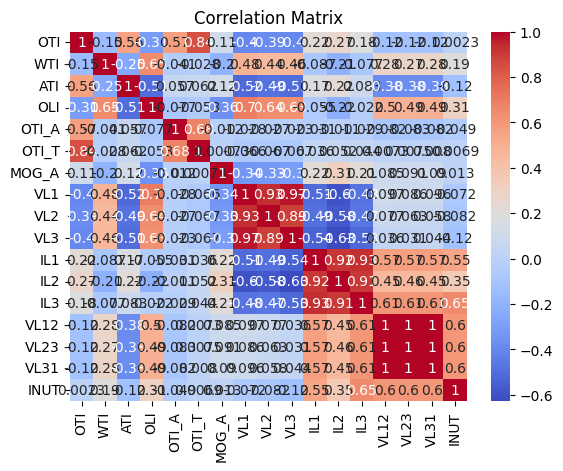

In [10]:
# tm_reduced= transformer.drop(['Year','Day',"Second","Month","Hour","Minute"], axis=1)
tm_reduced= transformer.drop(['DeviceTimeStamp'], axis=1)
transformer_matrix= tm_reduced.corr()
# plt.figure(figsize=(25, 25))
sns.heatmap(transformer_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<span class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Transformer Parameter Visualization</span>

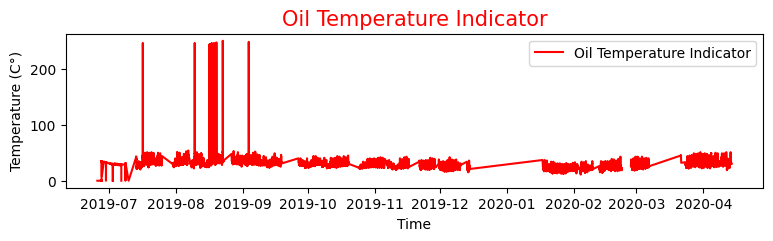

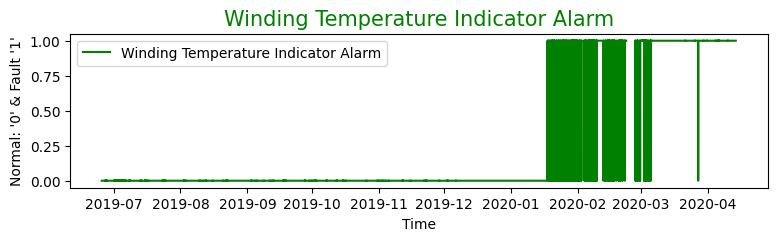

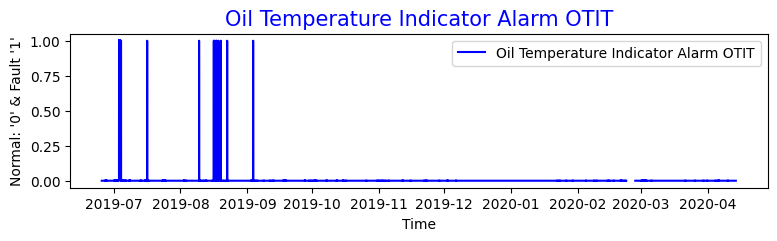

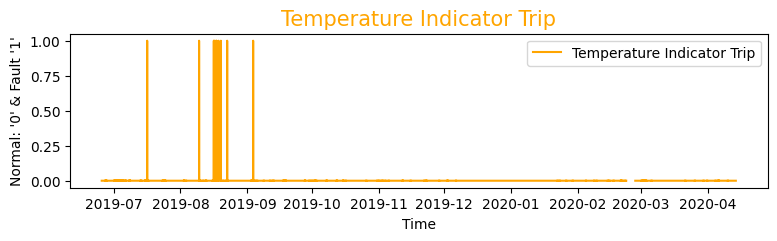

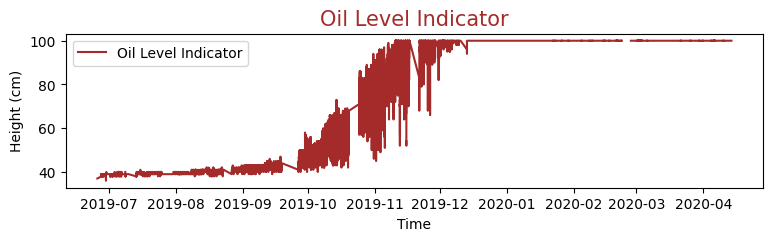

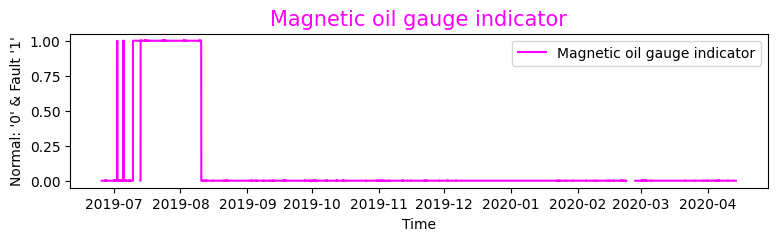

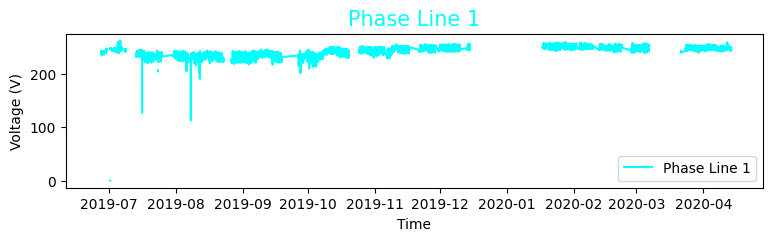

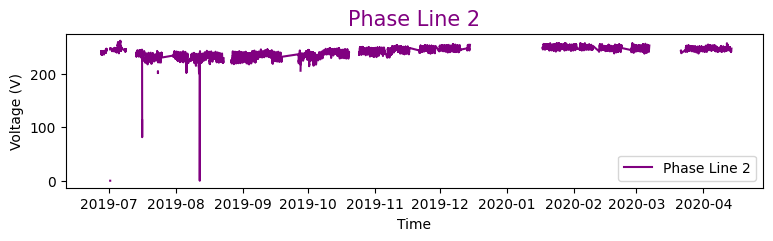

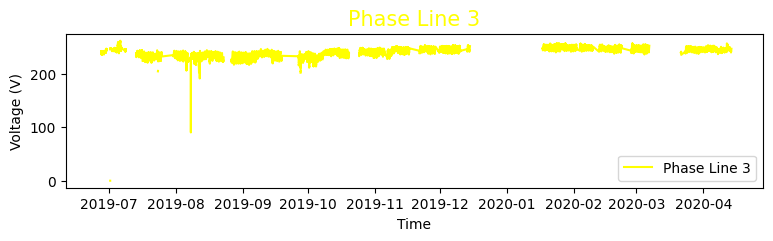

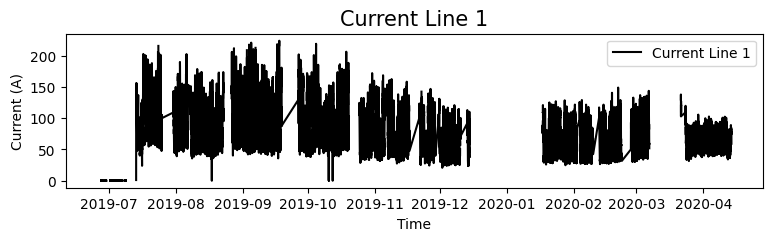

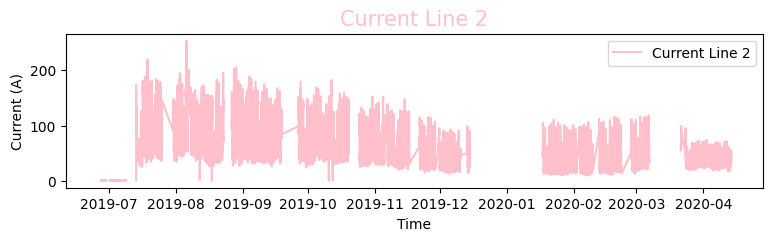

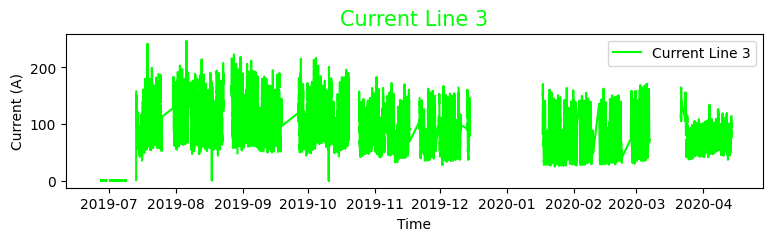

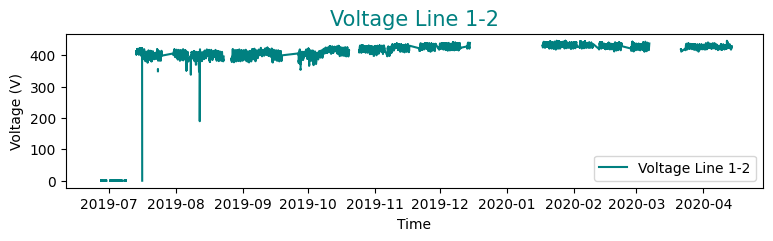

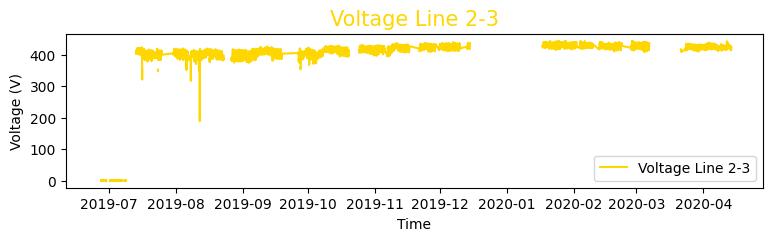

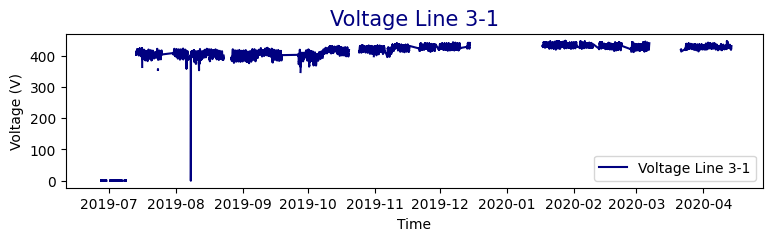

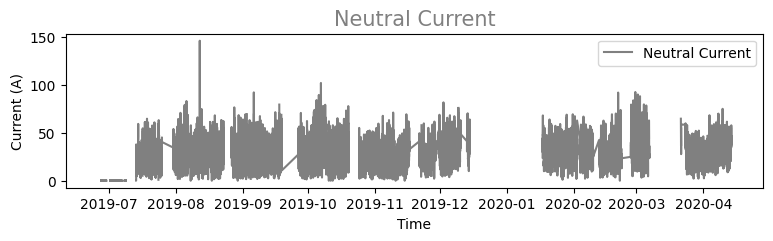

In [11]:
# Visualization of data structure
title_fontsize = 15
xlabel_label = "Time"
ylabel_labels = {
    "OTI": "Temperature (C°)",
    "WTI": "Normal: '0' & Fault '1'",
    "OTI_A": "Normal: '0' & Fault '1'",
    "OTI_T": "Normal: '0' & Fault '1'",
    "OLI": "Height (cm)",
    "MOG_A": "Normal: '0' & Fault '1'",
    "VL1": "Voltage (V)",
    "VL2": "Voltage (V)",
    "VL3": "Voltage (V)",
    "IL1": "Current (A)",
    "IL2": "Current (A)",
    "IL3": "Current (A)",
    "VL12": "Voltage (V)",
    "VL23": "Voltage (V)",
    "VL31": "Voltage (V)",
    "INUT": "Current (A)"
}
fig_width, fig_height = 9, 2  # Adjust figure size as needed
signals = [
    ("OTI", "Oil Temperature Indicator", "red"),
    ("WTI", "Winding Temperature Indicator Alarm", "green"),
    ("OTI_A", "Oil Temperature Indicator Alarm OTIT", "blue"),
    ("OTI_T", "Temperature Indicator Trip", "orange"),
    ("OLI", "Oil Level Indicator", "brown"),
    ("MOG_A", "Magnetic oil gauge indicator", "magenta"),
    ("VL1", "Phase Line 1", "cyan"),
    ("VL2", "Phase Line 2", "purple"),
    ("VL3", "Phase Line 3", "yellow"),
    ("IL1", "Current Line 1", "black"),
    ("IL2", "Current Line 2", "pink"),
    ("IL3", "Current Line 3", "lime"),
    ("VL12", "Voltage Line 1-2", "teal"),
    ("VL23", "Voltage Line 2-3", "gold"),
    ("VL31", "Voltage Line 3-1", "navy"),
    ("INUT", "Neutral Current", "grey")
]

# Create and plot each time series with specific labels and colors
for signal_name, label, color in signals:
    plt.figure(figsize=(fig_width, fig_height))
    plt.plot(transformer.DeviceTimeStamp, transformer[signal_name], label=label, color=color)
    plt.title(f"{label}", fontsize=title_fontsize, color=color)
    plt.legend()
    plt.xlabel(xlabel_label)
    plt.ylabel(ylabel_labels[signal_name])
    plt.show()


<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Classified Data Visualization (OTI_A,OTI_T,MOG_A)</h3>

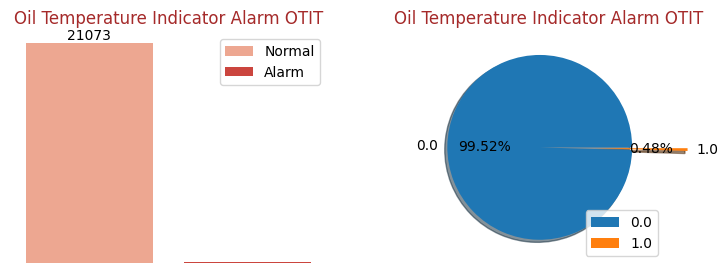

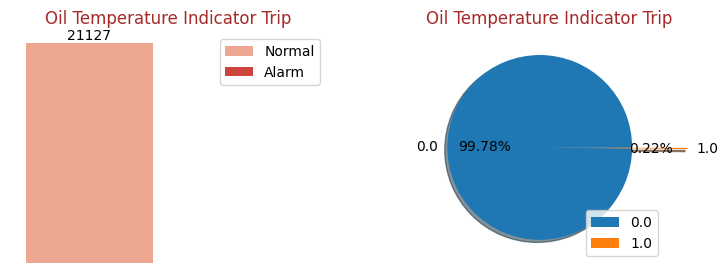

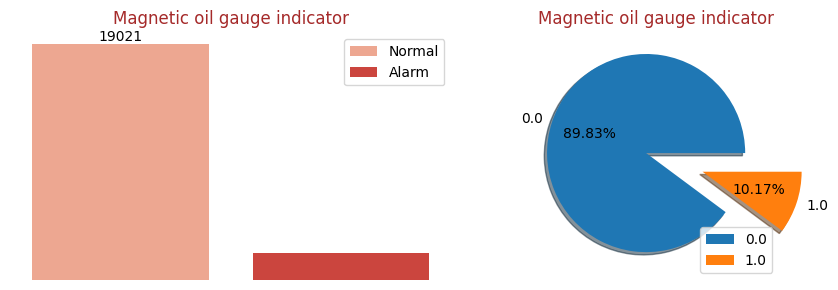

In [12]:
# The dataset contain three alarms which are listed below
# List of signals and their alarm states
signals = [
    ("OTI_A", "Oil Temperature Indicator Alarm OTIT", 'Reds', ['Normal', 'Alarm']),
    ("OTI_T", "Oil Temperature Indicator Trip", 'Reds', ['Normal', 'Alarm']),
    ("MOG_A", "Magnetic oil gauge indicator", 'Reds', ['Normal', 'Alarm'])
]

fig_width, fig_height = 9, 3  # Adjust figure size as needed

# Create a figure and subplots for each signal
for signal_name, title, palette, labels in signals:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(fig_width, fig_height))

    # Count plot (ax1)
    ax1 = sns.countplot(x=signal_name, data=transformer, palette=palette, ax=ax1,hue=signal_name,legend=False)
    ax1.bar_label(ax1.containers[0])
    ax1.set_title(title, color='brown')
    ax1.legend(labels=labels)
    ax1.axis('off')

    # Pie chart (ax2)
    ax2 = transformer[signal_name].value_counts().plot.pie(
        explode=[0.1, 0.5], autopct='%1.2f%%', shadow=True, ax=ax2,)
    ax2.set_title(label=title,color='brown')
    ax2.legend()
    ax2.axis('off')

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


<H3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Feauture reduction/Optimization</H3>

In [13]:

transformer['voltageAverage'] = round(transformer[['VL1', 'VL2', 'VL3']].mean(axis=1))
transformer['currentAverage'] = round(transformer[['IL1', 'IL2', 'IL3']].mean(axis=1))
transformer['voltageDifference'] = round(transformer[['VL12', 'VL23', 'VL31']].mean(axis=1))

<h3 class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Train Test Split</h3>

<div style="font-weight:bold;color:green;font-size:18px">WORKING ON THE MAGNETIC FAULT ALARM DATA AS OUR DEPENDENT VAIRABLE</div>

In [14]:
X = transformer.drop(['DeviceTimeStamp','MOG_A',"VL1","VL2","VL3","IL1","IL2","IL3",'VL12', 'VL23', 'VL31'],axis=1).interpolate() #independent variables 
y = transformer['MOG_A'].ffill() #dependent vairable
# X = transformer.drop(['DeviceTimeStamp','MOG_A'],axis=1).interpolate() #independent variables 


X.head()

,OTI,WTI,ATI,OLI,OTI_A,OTI_T,INUT,voltageAverage,currentAverage,voltageDifference
0,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,37.0,0.0,0.0,0.0,119.5,0.0,0.0
2,0.0,0.0,0.0,38.0,0.0,0.0,0.0,239.0,0.0,0.0
3,0.0,0.0,0.0,38.0,0.0,0.0,0.0,238.0,0.0,0.0
4,0.0,0.0,0.0,39.0,0.0,0.0,0.0,240.0,0.0,0.0


In [15]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=16)
# principal_components= pca.fit_transform(X)
# df_pca=pd.DataFrame(data=principal_components, columns=["OTI","WTI","ATI","OLI","OTI_A","OTI_T","INUT","VL1","VL2","VL3","IL1","IL2","IL3",'VL12', 'VL23', 'VL31'])
# df_pca.sample()

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.20,random_state=21)
X_train.head()

,OTI,WTI,ATI,OLI,OTI_A,OTI_T,INUT,voltageAverage,currentAverage,voltageDifference
12880,26.0,0.0,26.0,97.0,0.0,0.0,19.8,244.0,41.0,423.0
13961,25.0,0.0,25.0,100.0,0.0,0.0,19.9,246.0,57.0,426.0
617,33.0,0.0,34.0,39.0,0.0,0.0,0.0,239.0,0.0,0.0
7449,40.0,0.0,35.0,41.0,0.0,0.0,7.2,236.0,88.0,408.0
3816,35.0,0.0,31.0,39.0,0.0,0.0,23.4,235.0,62.0,405.0


<h3 class="label label-default" style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:28px; color:#FBFAFC; ">Normalizing the data</h3>

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<h1 style="color:white;background-color:Red;padding:2%;border-radius:100px 100px;font-size:3em;text-align:center">Model Implementation</h1>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-family:Nexa;
           letter-spacing:0.5px">
            <h2 style="padding: 15px;color:white;">1. Random Forest Classifier</h2>
</div>

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt  # Import for plotting
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
import time


In [19]:
from sklearn.metrics import accuracy_score

# Define the parameter grid to explore
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [3, 5, 8],  # Maximum depth of individual trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples required at each leaf node
}
rf_start=time.time()
# Create a RandomForestClassifier instance
random_forest = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
rf_grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)

# Train the model on the training set using GridSearchCV
rf_grid_search.fit(X_train, y_train)

# Access the best model with tuned hyperparameters
rf_best_model = rf_grid_search.best_estimator_

rf_best_model.fit(X_train, y_train)
rf_training_time = time.time()

# Define the classification threshold
threshold = 0.9

# Make predictions on the test set using the best model
y_pred_proba_rf = rf_best_model.predict_proba(X_test)[:, 1]
y_pred_rf = (y_pred_proba_rf >= threshold).astype(int)
rf_testing_time = time.time()

# Calculate training and testing accuracy using the best model
random_forest_train_accuracy = round(rf_best_model.score(X_train, y_train) * 100, 2)
random_forest_test_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

# Print the accuracy results
print(f"Training Accuracy with Hyperparameter Tuning: {random_forest_train_accuracy}%")
print(f"Testing Accuracy with Hyperparameter Tuning: {random_forest_test_accuracy}%")
print(f"RF Training Time: {rf_training_time - rf_start}s")
print(f"RF Testing Time: {rf_testing_time - rf_training_time }s")


Training Accuracy with Hyperparameter Tuning: 98.38%
Testing Accuracy with Hyperparameter Tuning: 91.74%
RF Training Time: 353.1244511604309s
RF Testing Time: 0.06266260147094727s


<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; ; color:#FBFAFC;padding:5px ">Random Forest confusion matrix</h3>

<Figure size 900x700 with 0 Axes>

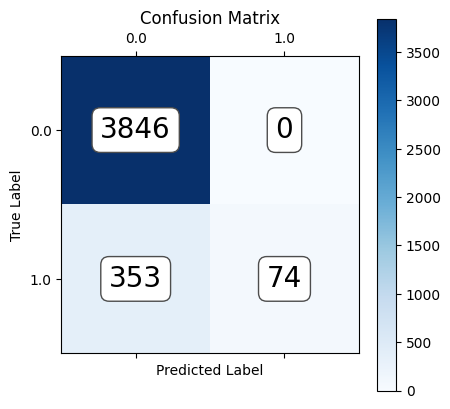

In [20]:
cm = confusion_matrix(y_test, y_pred_rf)

# Create and display the confusion matrix with informative labels and colormap
plt.figure(figsize=(9, 7))  # Adjust figure size as desired
plt.matshow(cm, cmap=plt.cm.Blues)  # Adjust colormap as desired
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=20, bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.show()

<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Calculate Random Forest F1-score, recall, and precision</h3>

In [21]:
# Calculate F1-score, recall, and precision
from sklearn.metrics import f1_score, recall_score, precision_score
random_forest_f1 = f1_score(y_test, y_pred_rf, average='weighted')
random_forest_recall = recall_score(y_test, y_pred_rf, average='weighted')
random_forest_precision = precision_score(y_test, y_pred_rf, average='weighted')
print("\n\033[1mF1-score:\033[0m", f"{random_forest_f1:.4f}")  
print("\033[1mRecall:\033[0m", f"{random_forest_recall:.4f}") 
print("\033[1mPrecision:\033[0m", f"{random_forest_precision:.4f}") 


F1-score: 0.8901
Recall: 0.9174
Precision: 0.9243


<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Random Forest ROC Curve</h3>

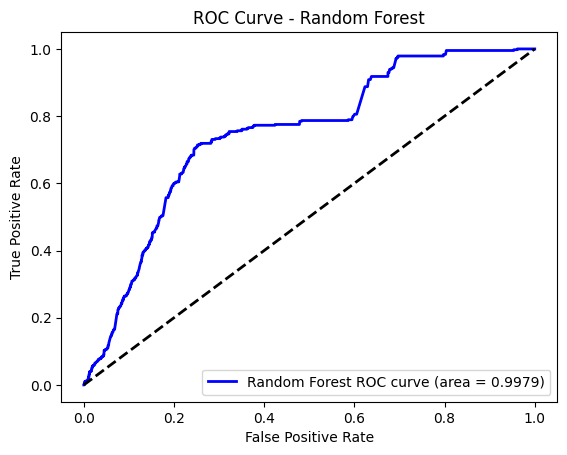

AUC Score of the Best Random Forest Model: 0.9978620690495068


In [59]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc

# Predict probabilities for Random Forest
y_pred_prob_rf = rf_best_model.predict_proba(X_test)[:, 1]


# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label= f'Random Forest ROC curve (area = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

# Print AUC score
print(f"AUC Score of the Best Random Forest Model: {roc_auc}")

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-family:Nexa;
           letter-spacing:0.5px">
            <h2 style="padding: 15px;color:white;">2. XGB Classiher</h2>
</div>

In [40]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# Define the parameter grid
param_grid = {
    'learning_rate': [0.05, 0.1, 0.3],
    'max_depth': [3, 5, 8],
    'n_estimators': [50, 100, 200],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.5, 0.7, 1],
    'colsample_bytree': [0.5, 0.7, 1]
}

# Perform grid search with 5-fold cross-validation
xgb_grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5)
xgb_grid_search.fit(X_train, y_train)

# Get the best model from grid search
xgb_best_model = xgb_grid_search.best_estimator_

# Fit the best model on the training data
xgb_best_model.fit(X_train, y_train)

# Predict probabilities for the test set using the best model
y_pred_proba_xgb = xgb_best_model.predict_proba(X_test)[:, 1]

# Change the threshold to 0.9 to get binary predictions
threshold = 0.9
y_pred_threshold_xgb = (y_pred_proba_xgb >= threshold).astype(int)

# Calculate accuracy with the new threshold
xgb_train_accuracy = round(accuracy_score(y_train, (xgb_best_model.predict_proba(X_train)[:, 1] >= threshold).astype(int)) * 100, 2)
xgb_test_accuracy = round(accuracy_score(y_test, y_pred_threshold_xgb) * 100, 2)

# Print results
print(f"Training Accuracy: {xgb_train_accuracy}%")
print(f"Testing Accuracy: {xgb_test_accuracy}%")


Training Accuracy: 98.44%
Testing Accuracy: 97.57%


In [41]:
y_pred_threshold_xgb

array([0, 0, 0, ..., 0, 0, 0])

AUC Score of the Best XGBoost Model: 0.9978620690495068


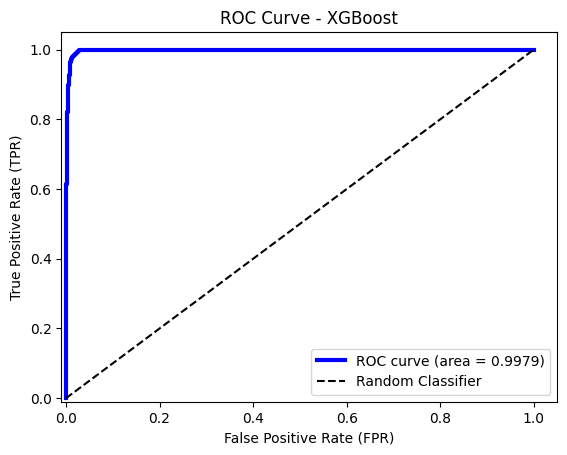

In [58]:
# Print AUC score
print(f"AUC Score of the Best XGBoost Model: {roc_auc}")
# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=3, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlim([-0.01, 1.05])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()



<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">Calculate XGBoost F1-score, recall, and precision</h3>

In [43]:
# Calculate F1-score, recall, and precision
from sklearn.metrics import f1_score, recall_score, precision_score

xgb_f1 = f1_score(y_test, y_pred_threshold_xgb, average='weighted')
xgb_recall = recall_score(y_test, y_pred_threshold_xgb, average='weighted')
xgb_precision = precision_score(y_test, y_pred_threshold_xgb, average='weighted')

# Print F1-score, recall, and precision with labels
print("\n\033[1mF1-score:\033[0m", f"{xgb_f1:.4f}")  
print("\033[1mRecall:\033[0m", f"{xgb_recall:.4f}") 
print("\033[1mPrecision:\033[0m", f"{xgb_precision:.4f}")



F1-score: 0.9745
Recall: 0.9757
Precision: 0.9755


In [26]:
y_pred_threshold_xgb

array([0, 0, 0, ..., 0, 0, 0])

<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">XGBoost confusion matrix</h3>

<Figure size 900x700 with 0 Axes>

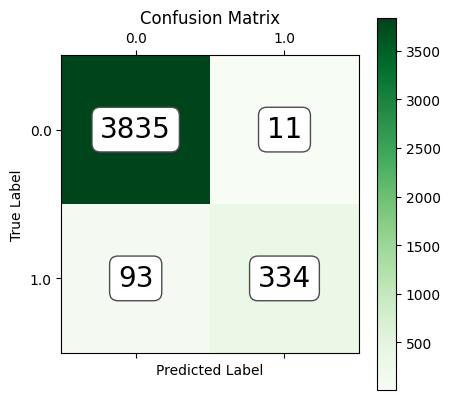

In [45]:

cm = confusion_matrix(y_test, y_pred_threshold_xgb)

# Create and display the confusion matrix with informative labels and colormap
plt.figure(figsize=(9, 7))  # Adjust figure size as desired
plt.matshow(cm, cmap=plt.cm.Greens)  
plt.colorbar()

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', fontsize=20, bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.yticks(range(len(np.unique(y_test))), np.unique(y_test))
plt.show()

<h3 style="background-color:#DC1010; border-radius:12px; font-weight: bold; font-family:Verdana; font-size:20px; color:#FBFAFC;padding:5px ">XGBoost ROC Curve</h3>

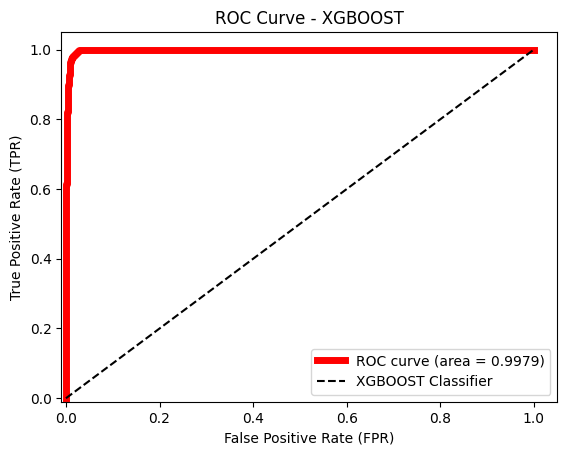

AUC Score of the Best Random Forest Model: 0.9978620690495068


In [46]:
# Import necessary libraries
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the test set using the best model
y_pred_threshold_xgb = xgb_best_model.predict_proba(X_test)[:, 1]

# Calculate false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_threshold_xgb)

# Calculate the Area Under the ROC Curve (AUC)
roc_auc = auc(fpr, tpr)

# Import libraries for plotting (optional)
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, color='red',lw=5, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='XGBOOST Classifier')
plt.xlim([-0.01, 1.05])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - XGBOOST')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()

# Print AUC score
print(f"AUC Score of the Best Random Forest Model: {roc_auc}")

<div style="
            background-color:cyan;
            font-family:Vardana;
            letter-spacing:0.5px;
            padding:5px;
            color:Red;
            border-style: solid;
            border-color: red;
            text-align:center;">
<h1>Comparing Multiple Models</h1>
</div>

In [47]:
models = pd.DataFrame({
    'Model': [
        'Random Forest','XGBClassifier'
    ],
    'Training Accuracy': [
        random_forest_train_accuracy,
        xgb_train_accuracy
    ],
    'Testing Accuracy Score': [
        random_forest_test_accuracy,
        xgb_test_accuracy
    ],
     'F1 Score': [
        random_forest_f1,
        xgb_f1
    ],
     'Precision': [
        random_forest_precision,
        xgb_precision
    ]
    , 'Recall': [
        random_forest_recall,
        xgb_recall
    ]
})


In [48]:
# pd.set_option('precision',1)
print("model accuracy table")
models.sort_values(by='Testing Accuracy Score', ascending=False)

model accuracy table


,Model,Training Accuracy,Testing Accuracy Score,F1 Score,Precision,Recall
1,XGBClassifier,98.44,97.57,0.974497,0.975504,0.975661
0,Random Forest,98.38,91.74,0.890097,0.924333,0.917388


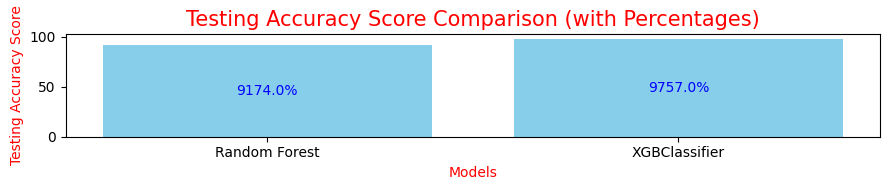

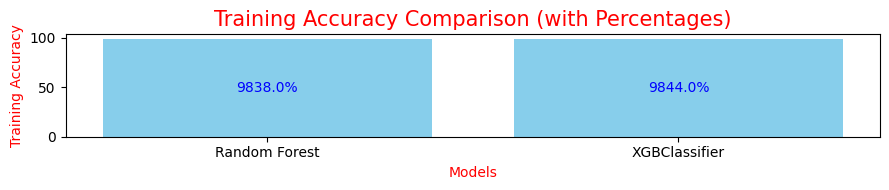

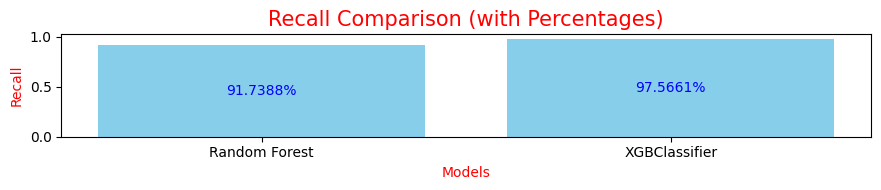

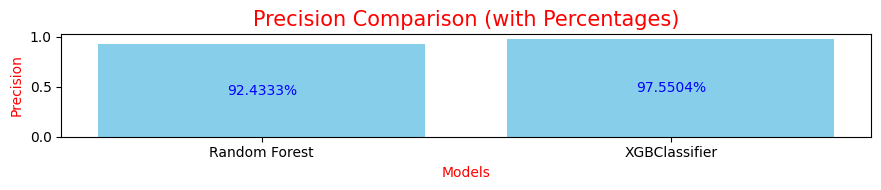

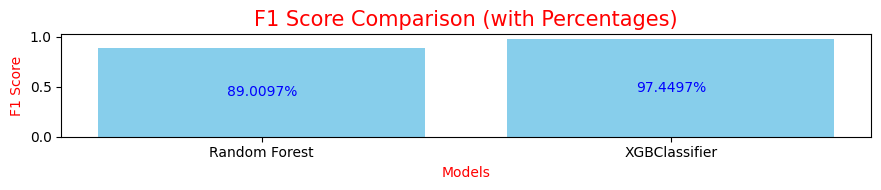

In [49]:
def create_bar_chart(metric_name, metric_values):

  fig, ax = plt.subplots(figsize=(fig_width, 2)) 

  # Extract model names (assuming "Model" key exists, handle potential absence)
  model_names = models.get("Model", list(models.keys()))  

  # Create the bar chart
  bars = ax.bar(model_names, metric_values, color='skyblue')  # Create bars

  # Round metric values and format as percentages for annotations
  percentages = [f"{round(score * 100, 4)}%" for score in metric_values]  # Calculate percentages, round to 4 decimals, format as strings

  # Annotate percentages on top of bars with centered alignment
  ax.bar_label(bars, percentages, label_type='center',color="blue")

  # Set x-axis labels and title
  ax.set_xlabel('Models',color="red")
  ax.set_ylabel(metric_name,color="red")
  ax.set_title(f'{metric_name} Comparison (with Percentages)', fontsize=15,color="red")


  plt.tight_layout()
  plt.show()

# Create bar charts for Recall, Precision,testing accuracy score and F1 Score
create_bar_chart("Testing Accuracy Score", models["Testing Accuracy Score"])
create_bar_chart("Training Accuracy", models["Training Accuracy"])
create_bar_chart("Recall", models["Recall"])
create_bar_chart("Precision", models["Precision"])
create_bar_chart("F1 Score", models["F1 Score"])



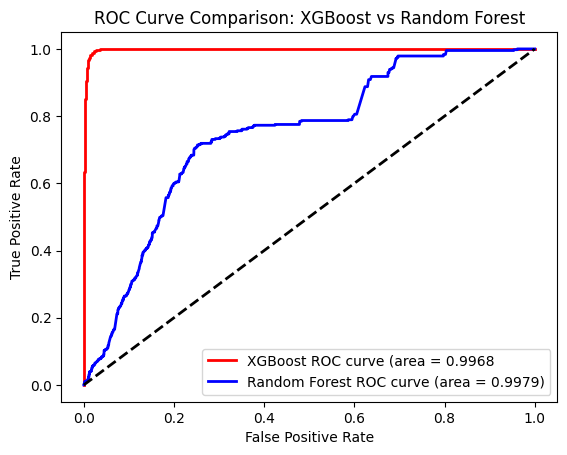

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for XGBoost
y_pred_prob_xgb = xgb_best_model.predict_proba(X_test)[:, 1]

# Predict probabilities for Random Forest
y_pred_prob_rf = rf_best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curves
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, color='red', lw=2, label='XGBoost ROC curve (area = 0.9968')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label= f'Random Forest ROC curve (area = {roc_auc_xgb:.4f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: XGBoost vs Random Forest')
plt.legend(loc="lower right")
plt.grid(False)
plt.show()



<b><h2>Cross Checking XGBoost</h2></b>

In [51]:
prediction_xgb = xgb_best_model.predict(X_test)
print(prediction_xgb)


[0 0 0 ... 0 0 0]


In [52]:
cross_checking_rf= pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction_xgb})
cross_checking_rf.sample(20).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LightBlue',
            'font-size': '15px'
        })


,Actual,Predicted
13795,0.000000,0
3108,1.000000,1
12965,0.000000,0
7015,0.000000,0
3944,1.000000,1
13841,0.000000,0
7996,0.000000,0
17134,0.000000,0
18731,0.000000,0
19309,0.000000,0


<b><h1>Cross Checking Random Forest</h1></b>

In [53]:
prediction_rf = rf_best_model.predict(X_test)
print(prediction_rf)

[0. 0. 0. ... 0. 0. 0.]


In [54]:

cross_checking_rf= pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction_rf})
cross_checking_rf.sample(20).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LightBlue',
            'font-size': '15px'
        })

,Actual,Predicted
3836,1.000000,1.000000
2432,0.000000,0.000000
7421,0.000000,0.000000
4231,1.000000,1.000000
14898,0.000000,0.000000
8760,0.000000,0.000000
8335,0.000000,1.000000
6827,0.000000,0.000000
21246,0.000000,0.000000
4882,1.000000,1.000000
